<a href="https://colab.research.google.com/github/MudSnail/Colab_Practice/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TESTING TESTING

In [ ]:
#import libaries
#import twitter
import requests as re
import regex
import string
import os
import pandas as pd
import numpy as np
import seaborn as sns
import json
from IPython.display import JSON
import re

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
#from emoji import demojize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


for future reference: https://medium.com/analytics-vidhya/twitter-sentiment-analysis-b9a12dbb2043
https://medium.com/analytics-vidhya/introduction-bd62190f6acd

## Download and Save Data

In [ ]:
consumer_key = "VwRbYCvZdsvUgdwKDkgmfRjrz"
consumer_secret = "7QzK2Ue8W8LUp8pDJkN2SZEGItN8mB1gpn8nnpfrmrxB3osNeA"
access_token = "1346233740314423297-0gUxKh41FzyNGSU2mMOSPGAjdIU0Ei"
access_token_secret = "SHJThaFKOzQQivyiqPmakoPGwMd2VF6Xgrd4BKIgkouzA"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAKzpXwEAAAAAhOMwastsh%2FN13zbycG8PhoFPNvk%3D4qOW0BfxsYpAWQW7Sbpvdr4ieVJbivjPA20chGi6JqGFJ1i21z"

In [ ]:
api = twitter.Api(consumer_key=consumer_key,
                  consumer_secret=consumer_secret,
                  access_token_key=access_token,
                  access_token_secret=access_token_secret)

In [ ]:
## FOLLOWING FUNCTION WILL COLLECT REAL-TIME TWEETS IN OUR COMPUTER

# data returned will be for any tweet mentioning strings in the list FILTER
FILTER = [':)',':(']

# Languages to filter tweets by is a list. This will be joined by Twitter
# to return data mentioning tweets only in the english language.
LANGUAGES = ['en']


def main(path, FILTER, LANGUAGES):
    with open(path, 'a') as f:
        # api.GetStreamFilter will return a generator that yields one status
        # message (i.e., Tweet) at a time as a JSON dictionary.
        count = 0
        for line in api.GetStreamFilter(track=FILTER, languages=LANGUAGES):
            print(count)
            count = count+1
            f.write(json.dumps(line))
            f.write('\n')

In [ ]:
# Execute function
main('smiles.txt', FILTER, LANGUAGES)

## Pre-Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load in data from text file, one line ata  time
with open ('/content/drive/MyDrive/Deep_Learning/smiles.txt', 'r') as myfile:
    contents = myfile.readlines()

# Convert list of texts in line form, to json format
tweet_texts = [json.loads(each_tweet) for each_tweet in contents]

# Compile each text string into list of strings
tweet_texts = [x['text'] for x in tweet_texts]

In [ ]:
#turn into dataframe
data = pd.DataFrame(tweet_texts, columns=['text'])
data.head()

,text
0,RT @soobslcver: why did i suddenly feel sad......
1,RT @BentoBoiNFT: 🎉 @CosmiqsNFT WHITE LIST SPOT...
2,@highlyaaronic The pre-tribulation rapture of ...
3,RT @BentoBoiNFT: 🎉 3 @SOVillains WHITE LIST SP...
4,RT @RamCinemas: We hope our Director @pandiraj...


In [ ]:
#test regex search
test = "RT @soobslcver: why did i suddenly feel sad... we don't give them the value they deserve :( https://t.co/wWEyPkGwJs"
negative = regex.findall("[:][)(]", test)
positve = regex.findall("[:][)]", test)
negative

[':(']

In [ ]:
#create empty list
faces = []

#run through tweet faces and find smiles and label as 1, if not 0
for text in tweet_texts:
    if regex.findall("[:][)]", text):
        faces.append(1)
    else:
        faces.append(0)

In [ ]:
#add faces list to dataframe
data['labels'] = faces
data.head()

,text,labels
0,RT @soobslcver: why did i suddenly feel sad......,0
1,RT @BentoBoiNFT: 🎉 @CosmiqsNFT WHITE LIST SPOT...,0
2,@highlyaaronic The pre-tribulation rapture of ...,1
3,RT @BentoBoiNFT: 🎉 3 @SOVillains WHITE LIST SP...,0
4,RT @RamCinemas: We hope our Director @pandiraj...,0


In [ ]:
data.labels.value_counts()

0    482
1    426
Name: labels, dtype: int64

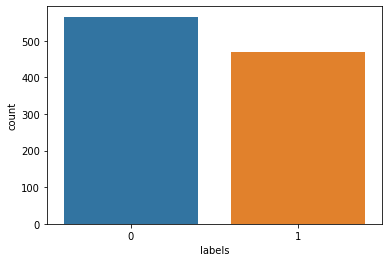

In [ ]:
#count positive and negative
sns.countplot(data=data, x ='labels')

In [ ]:
#Extract text column into variable
texts = data.text

#remove RT
texts = texts.str.replace(r"RT", "",regex=True)

# Lowercasing
texts = texts.str.lower()

# Remove special chars
#texts = texts.str.replace(r"(http|@)\S+", "",regex=True)
#texts = ' '.join(regex.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", texts).split())

#remove all special characters(https, tags, hashtags, emojis)
texts = texts.str.replace(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "",regex=True)

#remove numbers
texts = texts.str.replace('[0-9]+','', regex=True)

#remove single characters
texts = texts.str.replace(r'(?:^| )\w(?:$| )', ' ', regex=True)

#remove repeated words
texts = texts.str.replace(r'\b(\w+)( \1\b)+', r'\1', regex=True)

# Substituting multiple spaces with single space
texts = texts.str.replace('\s+', ' ', regex=True)

#Deleting space at beginning and ending
texts = texts.str.replace("^\s+|\s+$", "", regex=True)


In [ ]:
texts.tolist()

['why did suddenly feel sad we dont give them the value they deserve',
 'white list spots giveawayto enterfollow amp like tag friendpicking',
 'the pretribulation rapture of the church those saints that are martyred during the tribulation',
 'white list spots giveawayto enterfollow amp like tag friendpick',
 'we hope our director dir will do magic with singam offl on etharkkumthunindhavan as the same which he',
 'sheeesh looks amazing appreciate you guys',
 'lucky ukrainians get to blow up tm as well',
 'twt tiktok salemilese update captionft ryanwalkerpage dc yeonjun txtbighitent meortheps tomorro',
 'white list give away for the epic project over at launch is this month very soongiveaway ends tom',
 'pls support my daugters art thx',
 'put the dnf sims thread on my tl blocked',
 'love you so much aimz you really are an inspiration',
 'okokok live sable more of it guesscome listen to japanese breakfast wme',
 'oh no ben',
 'here are ur pics twin',
 'tob noticed this too',
 'happiness 

In [ ]:
# Emojis pattern
#texts = texts.apply(demojize) #needs to be adjusted -emoji library or someone elses formula deconstructured)
# emoji_pattern = regex.compile("["
#                 u"\U0001F600-\U0001F64F"  # emoticons
#                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                 u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                 u"\U00002702-\U000027B0"
#                 u"\U000024C2-\U0001F251"
#                 u"\U0001f926-\U0001f937"
#                 u'\U00010000-\U0010ffff'
#                 u"\u200d"
#                 u"\u2640-\u2642"
#                 u"\u2600-\u2B55"
#                 u"\u23cf"
#                 u"\u23e9"
#                 u"\u231a"
#                 u"\u3030"
#                 u"\ufe0f"
#     "]+", flags=regex.UNICODE)

#texts = emoji.get_emoji_regexp().sub(u'', texts)
#texts = emoji_pattern.sub(r'', texts)
#texts = texts.str.replace(r"::", ": :",regex=True)#may be able to remove

# texts = texts.str.replace(r"’", "'",regex=True)
#texts = texts.str.replace(r"[^a-z\':_]", " ",regex=True)
# #emojis
# #string punction
#texts = "".join([char for char in texts if char not in string.punctuation])
#white list spots giveaway

In [ ]:
#add processed tweets back to dataframe
data['clean_text'] = texts
data.head()

,text,labels,clean_text
0,RT @soobslcver: why did i suddenly feel sad......,0,why did suddenly feel sad we dont give them th...
1,RT @BentoBoiNFT: 🎉 @CosmiqsNFT WHITE LIST SPOT...,0,white list spots giveawayto enterfollow amp li...
2,@highlyaaronic The pre-tribulation rapture of ...,1,the pretribulation rapture of the church those...
3,RT @BentoBoiNFT: 🎉 3 @SOVillains WHITE LIST SP...,0,white list spots giveawayto enterfollow amp li...
4,RT @RamCinemas: We hope our Director @pandiraj...,0,we hope our director dir will do magic with si...


In [ ]:
#instantiate porter
porter = PorterStemmer()

#define stem function
def stem_text(text):
    words = word_tokenize(text)
    stemmed_text = ' '.join([porter.stem(word) for word in words])
    return stemmed_text

#create stemmed column
data['Stemmed'] = data['clean_text'].apply(lambda x: stem_text(x))

data.head(3)

,text,labels,clean_text,Stemmed
0,RT @soobslcver: why did i suddenly feel sad......,0,why did suddenly feel sad we dont give them th...,whi did suddenli feel sad we dont give them th...
1,RT @BentoBoiNFT: 🎉 @CosmiqsNFT WHITE LIST SPOT...,0,white list spots giveawayto enterfollow amp li...,white list spot giveawayto enterfollow amp lik...
2,@highlyaaronic The pre-tribulation rapture of ...,1,the pretribulation rapture of the church those...,the pretribul raptur of the church those saint...


In [ ]:
#partial string to look for
discard = ['giveaway']

#drop rows that contain partial string in stemmed col
data = data[~data.Stemmed.str.contains('|'.join(discard))]

#Reset index
data = data.reset_index(drop=True)

print(data.shape)
data.head()

(988, 4)


,text,labels,clean_text,Stemmed
0,RT @soobslcver: why did i suddenly feel sad......,0,why did suddenly feel sad we dont give them th...,whi did suddenli feel sad we dont give them th...
1,@highlyaaronic The pre-tribulation rapture of ...,1,the pretribulation rapture of the church those...,the pretribul raptur of the church those saint...
2,RT @RamCinemas: We hope our Director @pandiraj...,0,we hope our director dir will do magic with si...,we hope our director dir will do magic with si...
3,RT @BentoBoiNFT: @SmallBrosNFT @SquishySquadNF...,1,sheeesh looks amazing appreciate you guys,sheeesh look amaz appreci you guy
4,"@Huajiachicat @oryxspioenkop Lucky Ukrainians,...",1,lucky ukrainians get to blow up tm as well,lucki ukrainian get to blow up tm as well


In [ ]:
#check how many strings are empty
(data['Stemmed'].values == '').sum()

3

In [ ]:
#Create column for number of characters in Stemmed
data['No_C'] = data.Stemmed.str.len()

data.head()

,text,labels,clean_text,Stemmed,No_C
0,RT @soobslcver: why did i suddenly feel sad......,0,why did suddenly feel sad we dont give them th...,whi did suddenli feel sad we dont give them th...,64
1,@highlyaaronic The pre-tribulation rapture of ...,1,the pretribulation rapture of the church those...,the pretribul raptur of the church those saint...,78
2,RT @RamCinemas: We hope our Director @pandiraj...,0,we hope our director dir will do magic with si...,we hope our director dir will do magic with si...,101
3,RT @BentoBoiNFT: @SmallBrosNFT @SquishySquadNF...,1,sheeesh looks amazing appreciate you guys,sheeesh look amaz appreci you guy,33
4,"@Huajiachicat @oryxspioenkop Lucky Ukrainians,...",1,lucky ukrainians get to blow up tm as well,lucki ukrainian get to blow up tm as well,41


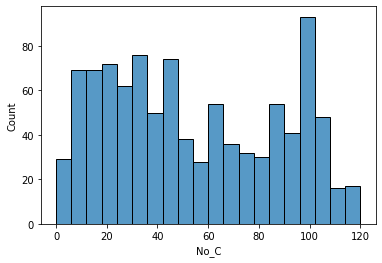

In [ ]:
#view distribution
sns.histplot(data = data, x = 'No_C', bins=20)

In [ ]:
#Check how many rows have less than 10 characters
data[data['No_C'] < 10].count()

text          67
labels        67
clean_text    67
Stemmed       67
No_C          67
dtype: int64

In [ ]:
#drop rows with characters less than 10
data = data[data['No_C'] > 10]

#check data shape
data.shape

(908, 5)

# Sentiment Analysis

In [ ]:
tweet_analyzer = SentimentIntensityAnalyzer()

#Creating new column with sentiment prdiction using VADER
sentiment = []
for tweet in data['Stemmed']:
    score = tweet_analyzer.polarity_scores(tweet)
    compound = score['compound']
    if compound > 0: compound = "positive"
    elif compound < 0: compound = "negative"
    else: compound = "neutral"
    sentiment.append(compound)
    
data['sentiment'] = sentiment

In [ ]:
data.sentiment.value_counts()

positive    456
neutral     276
negative    176
Name: sentiment, dtype: int64

# Make a baseline model

1. vectorizer - cut out stopwords
2. try naive bayes, log regression, random forest and support vector

In [ ]:
#Pull data into X and Y (target)
X = data.Stemmed
y = data.labels

In [ ]:
#download libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#Instantiate vectorizer and remove stopwords
vectorizer=TfidfVectorizer(max_features=2500, 
                          min_df= 7,
                          max_df=0.8, 
                          stop_words=stopwords.words('english'))

#fit and transform with X
fit_data = vectorizer.fit_transform(X)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fit_data, y, random_state=42)

### Naive Bayes

In [ ]:
from sklearn import naive_bayes

#instantiate and fit classifier
clf = naive_bayes.MultinomialNB()
clf.fit(X_train, y_train)

#Predict X_test
y_predict = clf.predict(X_test)

In [ ]:
#check metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

print("NB Confusion Matrix\n", confusion_matrix(y_test,y_predict))

print("NB accuracy:", accuracy_score(y_test, y_predict))

print("NB Roc Score:", roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

NB Confusion Matrix
 [[80 39]
 [39 69]]
NB accuracy: 0.6563876651982379
NB Roc Score: 0.7502723311546842


### Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#instantiate and fit classifier
reg = LogisticRegression()
reg.fit(X_train, y_train)

#Predict X_test
y_reg = reg.predict(X_test)

In [ ]:
#Check metrics
print("Log. Reg Confusion Matrix\n", confusion_matrix(y_test,y_reg))

print("Log. Reg accuracy:", accuracy_score(y_test, y_reg))

print("Log. Reg Roc Score:", roc_auc_score(y_test, reg.predict_proba(X_test)[:,1]))

Log. Reg Confusion Matrix
 [[80 39]
 [29 79]]
Log. Reg accuracy: 0.7004405286343612
Log. Reg Roc Score: 0.7719810146280734


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#instantiate and fit classifier
rfc = RandomForestClassifier(n_estimators=500, random_state=12)
rfc.fit(X_train, y_train)

#Predict X_test
y_rfc = rfc.predict(X_test)

#Check metrics
print("Random Forest Confusion Matrix\n", confusion_matrix(y_test,y_rfc))

print("Random Forest accuracy:", accuracy_score(y_test, y_rfc))

print("Random Forest Roc Score:", roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]))

Random Forest Confusion Matrix
 [[76 43]
 [25 83]]
Random Forest accuracy: 0.7004405286343612
Random Forest Roc Score: 0.7845082477435419


In [ ]:
#Let us try it on a twwe

#turn it into array as we trained on array
tweet_array = np.array(["This is terrible"])

tweet_vector = vectorizer.transform(tweet_array)

print(rfc.predict(tweet_vector))

[1]


### Support Vector Machine

In [ ]:
from sklearn import svm

#instantiate and fit classifier
svc = svm.SVC(kernel='linear', C=1, probability = True)
svc.fit(X_train, y_train)

#Predict X_test
y_svc = svc.predict(X_test)

#Check metrics
print("SVC Confusion Matrix\n", confusion_matrix(y_test,y_svc))

print("SVC accuracy:", accuracy_score(y_test, y_svc))

print("SVC Roc Score:", roc_auc_score(y_test, svc.predict_proba(X_test)[:,1]))

SVC Confusion Matrix
 [[78 41]
 [26 82]]
SVC accuracy: 0.7048458149779736
SVC Roc Score: 0.732609710550887


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 6.6 MB/s 


In [ ]:
#Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


tweet_analyzer = SentimentIntensityAnalyzer()

#Creating new column with sentiment prdiction using VADER
sentiment = []
for tweet in data['Stemmed']:
    score = tweet_analyzer.polarity_scores(tweet)
    compound = score['compound']
    if compound > 0: compound = "positive"
    elif compound < 0: compound = "negative"
    else: compound = "neutral"
    sentiment.append(compound)
    
data['sentiment'] = sentiment


In [ ]:
data.sentiment.value_counts()/len(data.sentiment)*100

positive    50.220264
neutral     30.396476
negative    19.383260
Name: sentiment, dtype: float64

In [ ]:
#try textblob
from textblob import TextBlob

polarity = []
subjectivity = []
for p in data.Stemmed:
  text_blob = TextBlob(p).sentiment
  polarity.append(text_blob[0])
  subjectivity.append(text_blob[1])

#append to data
data['polarity'] = polarity
data['subject'] = subjectivity

#view data
data.head()


,text,labels,clean_text,Stemmed,No_C,sentiment,polarity,subject
0,RT @soobslcver: why did i suddenly feel sad......,0,why did suddenly feel sad we dont give them th...,whi did suddenli feel sad we dont give them th...,64,negative,-0.50,1.0000
1,@highlyaaronic The pre-tribulation rapture of ...,1,the pretribulation rapture of the church those...,the pretribul raptur of the church those saint...,78,neutral,0.00,0.0000
2,RT @RamCinemas: We hope our Director @pandiraj...,0,we hope our director dir will do magic with si...,we hope our director dir will do magic with si...,101,positive,0.25,0.5625
3,RT @BentoBoiNFT: @SmallBrosNFT @SquishySquadNF...,1,sheeesh looks amazing appreciate you guys,sheeesh look amaz appreci you guy,33,neutral,0.00,0.0000
4,"@Huajiachicat @oryxspioenkop Lucky Ukrainians,...",1,lucky ukrainians get to blow up tm as well,lucki ukrainian get to blow up tm as well,41,positive,0.00,0.0000


In [ ]:
data.groupby(['sentiment'])['polarity'].mean()

sentiment
negative   -0.119192
neutral     0.012057
positive    0.195524
Name: polarity, dtype: float64

In [ ]:
data.groupby(['sentiment'])['subject'].mean()

sentiment
negative    0.347077
neutral     0.133930
positive    0.348592
Name: subject, dtype: float64

# Deep Learning - Word Embedding/Padding

In [ ]:
from nltk import tokenize
from keras.preprocessing.text import Tokenizer

#max number of characters is 120
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

new_train = tokenizer.texts_to_sequences(X_test)
new_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

print(X_train[2])
print(new_train[2])

AttributeError: ignored

In [ ]:
#apply padding

from keras.preprocessing.sequence import pad_sequences

#max length of tweets is 120
maxlen = 120

new_train = pad_sequences(new_train, padding='post', maxlen=maxlen)
new_test = pad_sequences(new_test, padding='post', maxlen=maxlen)

print(new_train[0, :])

In [ ]:
from keras.models import Sequential
from keras import layers

In [ ]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)